<a href="https://colab.research.google.com/github/rah1n/Visualize/blob/main/sigakhwa%20kwajae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (49.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [29]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
plt.rc('font', family='NanumBarunGothic')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
hdata=pd.read_csv('/content/drive/My Drive/아비혁/health_data.csv')
display(hdata.head())
print(hdata.info())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

,성별코드,meancol
0,F,201.625372
1,M,194.925962


[(150.0, 225.0)]

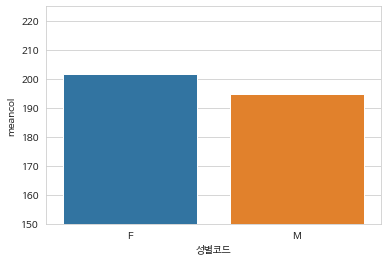

In [50]:
df_hdata=hdata.groupby('성별코드', as_index=False).agg( meancol=('총콜레스테롤', 'mean'))
display(df_hdata.head())
sns.barplot(data=df_hdata, x='성별코드', y='meancol').set(ylim=(150, 225))

- 콜레스테롤 수치와 성별 간의 관계성을 찾아보고자 데이터를 성별과 성별에 따른 콜레스테롤 수치 평균으로 제한하여 시각화하였다. 분석 결과, 여성의 경우가 남성에 비해 콜레스테롤 수치가 높았다. 여성과 남성의 신체구조가 달라 이런 결과가 나온 것으로 추측된다.

,연령대코드(5세단위),meancol
0,9,205.393617
1,10,203.214765
2,11,203.975952
3,12,205.863158
4,13,197.902004


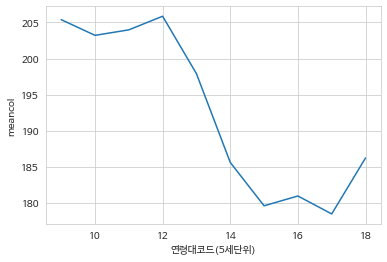

In [48]:
as_data=hdata.groupby('연령대코드(5세단위)', as_index=False).agg(meancol=('총콜레스테롤', 'mean'))
display(as_data.head())
sns.lineplot(data=as_data, x='연령대코드(5세단위)', y='meancol')

- 연령대와 콜레스테롤 수치 간의 관계성을 알아보기 위해 데이터를 연령대와 연령대별 콜레스테롤 수치 평균으로 제한하여 수치화하였다. 연령대코드는 5세단위 별로 구간이 나뉘어있기 때문에 9구간의 수치는 45세에서 49세, 10구간의 수치는 50세에서 54세를 뜻한다. 수치가 9부터 시작하여 원인을 추측해본 결과, 아직 비교적 나이가 젊은 44세 이하는 콜레스테롤 수치를 측정하지 않아 그런 것으로 추측된다.
나이가 많아질 수록 콜레스테롤 수치가 상승할 것이라는 예측과는 다르게 연령대가 60세 기점을 넘어가면서 수치는 급격히 감소하였으며, 90세를 기점으로 다시 소폭 상승하였다. 사람이 나이가 들 수록 식사량이 줄어들고 소화기관이 점차 활동을 줄이는 것을 생각해보면, 나이가 들면서 식사량이 줄어, 유해한 성분 섭취가 줄어들어 자연스레 콜레스테롤 수치가 줄어드는 것으로 추측할 수 있다. 90세 이상부터 다시 증가하는 것은 신체의 노화로 인한 자정작용 저하가 원인으로 보인다.

<function matplotlib.pyplot.show(*args, **kw)>

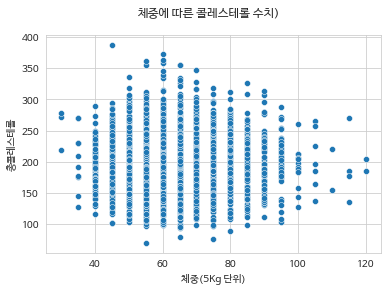

In [74]:
sns.scatterplot(data=hdata, x='체중(5Kg 단위)', y='총콜레스테롤')
plt.suptitle("체중에 따른 콜레스테롤 수치)")
plt.show

- 마지막으로 체중에 따른 콜레스테롤 수치를 분석하기 위해 데이터를 체중과 총콜레스테롤로 제한하여 산점도로 표시하였다. 체중이 많을 수록 콜레스테롤 수치가 높을 것이라는 예상과는 다르게 50~70kg대의 사람이 콜레스테롤 수치가 비교적 높았으며, 폭 또한 넓었다. 오히려 90kg 이상의 콜레스테롤 수치가 40kg대의 콜레스테롤 수치보다 낮았다.
체중이 많이 나가는 사람들은 체중이 적게 나가는 사람들에 비해 식단이나 섭취 영양분을 관리할 것이기 때문에, 체중이 많이 나가더라도 오히려 콜레스테롤 수치는 낮은 것으로 보인다. 혹은 체중이 많이 나간다는 것은 지방이 많은 것이 아닌 근육이 많은 것일 수도 있기 때문에 해당 결과가 나온 것으로 추측된다.